### Unsupervised Learning:

* There won't be any supervision on the model.
* We provide only the input.
* There are two methods in unsupervised learning
    * Clustering -- grouping 
        * K-Means Clustering
    * Associative -- Combines more clusters.
    
    



### K-Means Clustering :

* This is one of the clustering algorithm,which works distance based on distenace two points.
* k is the number  of clusters to be formed.
* K values sholud be higher for better results.

**Steps involved in k-means clustering**:

* select the value.
    * There are two methods for finding the k-value.
        * Elbow Method
            * Will find the distance of the eachpoint and draw the graph
            * From the graph we will observe and will take the point where slope will be fallen.That point will be considered as k value.
        * sillhoutee Method
            * This uses elbow method and also finds the coefficients.
            * Select the groups and finds the average .

<img src = "https://editor.analyticsvidhya.com/uploads/56854k%20means%20clustering.png">

**How does K-means clustering algorithm work?**

<img src = "https://editor.analyticsvidhya.com/uploads/34513k%20means.png">

**Euclidean Distance:**

<img src = "https://editor.analyticsvidhya.com/uploads/96840RtnTY.jpg">


**Elbow method:**

<img src = "https://editor.analyticsvidhya.com/uploads/39510Beyond_the_k-Means_5.png">

**Elbow curve:**

<img src = "https://editor.analyticsvidhya.com/uploads/40205elbow.png">



**Silhoutee method:**

s(i) = b(i) - a(i)/larger of b(i) and a(i)

In [1]:
##importing the libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
## loading the dataset:

data = pd.read_csv("https://raw.githubusercontent.com/AP-Skill-Development-Corporation/Tirumala-ML/main/Day-11/Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
X = data.iloc[:,[3,4]].values

In [6]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [8]:
from sklearn.cluster import KMeans


In [10]:
## finding the k- values using elbow:

elbow = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = "k-means++",random_state = 42)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)

In [11]:
elbow

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25011.83934915659,
 21850.165282585633,
 19672.07284901432]

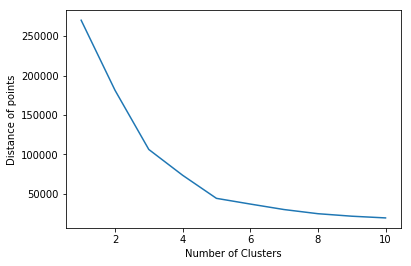

In [12]:
plt.plot(range(1,11),elbow)
plt.xlabel("Number of Clusters")
plt.ylabel("Distance of points")
plt.show()

**from the above graph we can observe the slope of the line is fallen at the point 5.so K = 5.**

In [13]:
kmeans = KMeans(n_clusters = 5,init = "k-means++",random_state = 42)
y_means = kmeans.fit_predict(X)

In [14]:
y_means

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

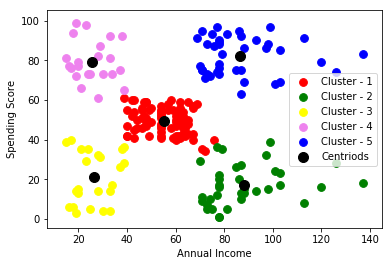

In [17]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],s = 60,c = "red",label = "Cluster - 1")
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],s = 60,c = "Green",label = "Cluster - 2")
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],s = 60,c = "yellow",label = "Cluster - 3")
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],s = 60,c = "violet",label = "Cluster - 4")
plt.scatter(X[y_means == 4,0],X[y_means == 4,1],s = 60, c = "blue",label = "Cluster - 5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 100,c = "black",label = "Centriods")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend(loc = "best")
plt.show()

In [18]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,